In [1]:
import pandas
from pandas import read_excel, date_range, DatetimeIndex, DataFrame, to_numeric, concat, to_datetime
from pandas.plotting import lag_plot, autocorrelation_plot
from pandas.tseries.offsets import DateOffset

import numpy
from numpy import logical_not

import statistics
import dateutil.relativedelta

import fbprophet
from fbprophet import Prophet

import calendar
from calendar import monthrange

from datetime import datetime, timedelta
from matplotlib import pyplot

from sklearn.metrics import mean_absolute_error, mean_squared_error

from math import sqrt

Importing plotly failed. Interactive plots will not work.


In [2]:
# cambiamos el valor de estos 4 parametros para que nos muestre dataframes sin truncarlos
pandas.set_option('display.max_rows', 12)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.width', None)
pandas.set_option('display.max_colwidth', None)

In [3]:
# Load data using read_excel
transacciones_df = read_excel('20210513 mmelero (249236).xlsx', sheet_name='Hoja1')
transacciones_df

,Fecha transacción,Importe,ID Categoría,Nombre categoría,Nivel categoría,iD categoría padre,Nombre categoría padre,Proveedor,Marca,Sector,Financiero,Transferencia,Unnamed: 12,Unnamed: 13,ID,BALANCE,BALANCE_DATE
0,2020-07-24,-1.20,84.0,parking_84,2.0,5.0,vehiculos_5,NaN,NaN,NaN,False,False,NaN,NaN,249236.0,1478.98,2020-07-26
1,2020-07-23,-4.50,117.0,regalos_celebraciones_117,2.0,8.0,gastos_personales_8,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaT
2,2020-07-23,-13.53,70.0,supermercados_70,2.0,4.0,alimentacion_4,SPAR,SPAR,Supermercados,False,False,NaN,NaN,NaN,NaN,NaT
3,2020-07-22,-51.40,222.0,adsl_222,3.0,521.0,Comunicaciones y TV,Jazz Telecom,Jazztel,Compañías telecomunicaciones,False,False,NaN,NaN,NaN,NaN,NaT
4,2020-07-22,-11.00,70.0,supermercados_70,2.0,4.0,alimentacion_4,Mercadona,Mercadona,Supermercados,False,False,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,2016-09-05,1533.02,18.0,retribucion_liquida_18,3.0,576.0,Nómina,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaT
1483,2016-09-05,-617.47,126.0,liquidacion_tarjeta_126,3.0,478.0,tarjetas_credito_478,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaT
1484,2016-09-05,-138.08,125.0,cuotas_125,3.0,127.0,otros_pasivos_127,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN,NaT
1485,2016-09-01,-32.22,90.0,seguro_salud_90,2.0,6.0,salud_6,Sanitas S.A. de Seguros,Sanitas,Seguros de salud,True,False,NaN,NaN,NaN,NaN,NaT


In [4]:
# nos quedamos con categoria desde 'Fecha transacción' hasta 'Nombre Categoría'
transacciones_df=transacciones_df.iloc[:,0:4]
transacciones_df

,Fecha transacción,Importe,ID Categoría,Nombre categoría
0,2020-07-24,-1.20,84.0,parking_84
1,2020-07-23,-4.50,117.0,regalos_celebraciones_117
2,2020-07-23,-13.53,70.0,supermercados_70
3,2020-07-22,-51.40,222.0,adsl_222
4,2020-07-22,-11.00,70.0,supermercados_70
...,...,...,...,...
1482,2016-09-05,1533.02,18.0,retribucion_liquida_18
1483,2016-09-05,-617.47,126.0,liquidacion_tarjeta_126
1484,2016-09-05,-138.08,125.0,cuotas_125
1485,2016-09-01,-32.22,90.0,seguro_salud_90


In [5]:
# nos quedamos con las transacciones de la categoria 'seguro_salud_90'
transacciones_90_df=transacciones_df[transacciones_df['ID Categoría'] == 90.0]
del(transacciones_df)
transacciones_90_df

,Fecha transacción,Importe,ID Categoría,Nombre categoría
303,2019-04-10,72.38,90.0,seguro_salud_90
338,2019-03-01,-71.10,90.0,seguro_salud_90
339,2019-03-01,-37.07,90.0,seguro_salud_90
352,2019-02-14,-71.10,90.0,seguro_salud_90
374,2019-02-01,-37.07,90.0,seguro_salud_90
...,...,...,...,...
1335,2017-01-02,-47.22,90.0,seguro_salud_90
1385,2016-12-01,-32.22,90.0,seguro_salud_90
1431,2016-11-02,-32.22,90.0,seguro_salud_90
1471,2016-10-03,-37.22,90.0,seguro_salud_90


In [6]:
# quitamos las columnas de 'ID Categoría' y 'Nombre Categoría' que ya no nos aportan nada
transacciones_90_df=transacciones_90_df.drop(columns=['ID Categoría', 'Nombre categoría'], inplace=False)
transacciones_90_df

,Fecha transacción,Importe
303,2019-04-10,72.38
338,2019-03-01,-71.10
339,2019-03-01,-37.07
352,2019-02-14,-71.10
374,2019-02-01,-37.07
...,...,...
1335,2017-01-02,-47.22
1385,2016-12-01,-32.22
1431,2016-11-02,-32.22
1471,2016-10-03,-37.22


In [7]:
# renombramos columnas
transacciones_90_df=transacciones_90_df.rename(columns={'Fecha transacción': 'FECHA', 'Importe': 'IMPORTE'}, inplace=False)
transacciones_90_df

,FECHA,IMPORTE
303,2019-04-10,72.38
338,2019-03-01,-71.10
339,2019-03-01,-37.07
352,2019-02-14,-71.10
374,2019-02-01,-37.07
...,...,...
1335,2017-01-02,-47.22
1385,2016-12-01,-32.22
1431,2016-11-02,-32.22
1471,2016-10-03,-37.22


In [8]:
# ordenamos las fechas por orden ascendente
transacciones_90_df=transacciones_90_df.sort_values(by=['FECHA'], ascending=True, inplace=False, ignore_index=True)
transacciones_90_df

,FECHA,IMPORTE
0,2016-09-01,-32.22
1,2016-10-03,-37.22
2,2016-11-02,-32.22
3,2016-12-01,-32.22
4,2017-01-02,-47.22
...,...,...
54,2019-02-01,-37.07
55,2019-02-14,-71.10
56,2019-03-01,-37.07
57,2019-03-01,-71.10


In [9]:
# vamos a agrupar los valores y sumarlos por fecha para agrupar cargos distintos realizados el mismo dia
transacciones_90_df=transacciones_90_df.groupby(['FECHA']).sum()
transacciones_90_df

,IMPORTE
FECHA,
2016-09-01,-32.22
2016-10-03,-37.22
2016-11-02,-32.22
2016-12-01,-32.22
2017-01-02,-47.22
...,...
2019-01-02,-114.45
2019-02-01,-108.17
2019-02-14,-71.10


In [10]:
# para que los datos sean más fáciles de interpretar vamos a hacerlos todos positivos multiplicandolos por '-1'
transacciones_90_df['IMPORTE']=-transacciones_90_df['IMPORTE']
transacciones_90_df

,IMPORTE
FECHA,
2016-09-01,32.22
2016-10-03,37.22
2016-11-02,32.22
2016-12-01,32.22
2017-01-02,47.22
...,...
2019-01-02,114.45
2019-02-01,108.17
2019-02-14,71.10


In [11]:
# hacemos el dataframe del dia de pago del seguro medico
transacciones_90_dia_df=transacciones_90_df.copy()
transacciones_90_dia_df

,IMPORTE
FECHA,
2016-09-01,32.22
2016-10-03,37.22
2016-11-02,32.22
2016-12-01,32.22
2017-01-02,47.22
...,...
2019-01-02,114.45
2019-02-01,108.17
2019-02-14,71.10


In [12]:
# hacemos una columna con la fecha a partir del índice
transacciones_90_dia_df['FECHA']=transacciones_90_dia_df.index
transacciones_90_dia_df

,IMPORTE,FECHA
FECHA,,
2016-09-01,32.22,2016-09-01
2016-10-03,37.22,2016-10-03
2016-11-02,32.22,2016-11-02
2016-12-01,32.22,2016-12-01
2017-01-02,47.22,2017-01-02
...,...,...
2019-01-02,114.45,2019-01-02
2019-02-01,108.17,2019-02-01
2019-02-14,71.10,2019-02-14


In [13]:
# hacemos una columna con el dia a partir de la columna de la fecha
transacciones_90_dia_df['DIA'] = transacciones_90_dia_df['FECHA'].dt.day
transacciones_90_dia_df

,IMPORTE,FECHA,DIA
FECHA,,,
2016-09-01,32.22,2016-09-01,1
2016-10-03,37.22,2016-10-03,3
2016-11-02,32.22,2016-11-02,2
2016-12-01,32.22,2016-12-01,1
2017-01-02,47.22,2017-01-02,2
...,...,...,...
2019-01-02,114.45,2019-01-02,2
2019-02-01,108.17,2019-02-01,1
2019-02-14,71.10,2019-02-14,14


In [14]:
# calculamos la moda - tomaremos la moda como el dia de cobro mas habitual
stat_mode_dist = statistics.mode(transacciones_90_dia_df['DIA'])
stat_mode_dist

1

In [15]:
# extraemos el 1er cuartil
quartil1_dist = int(transacciones_90_dia_df.describe().loc['25%']['DIA'])
quartil1_dist

1

In [16]:
# extraemos el 3er cuartil
quartil3_dist = int(transacciones_90_dia_df.describe().loc['75%']['DIA'])
quartil3_dist

3

In [17]:
# calculamos el rango intercuartilico
iqr_dist = quartil3_dist - quartil1_dist
iqr_dist

2

In [18]:
# si NO pasan recibo a FIN DE MES
if stat_mode_dist < 28:    
    iqr = iqr_dist
# si SÍ pasan recibo a FIN DE MES
else:
    # si quartil3_dist - quartil1_dist es mayor a 4 dias
    if iqr_dist > 4:
        iqr = 4
    else:
        iqr = iqr_dist
iqr

2

In [19]:
# pedimos al usuario la fecha (en produccion tomamos la fecha del sistema)
year = input('year: ')
month = input('month: ')
day = input('day: ')

year: 2019
month: 1
day: 20


In [20]:
# pasamos la fecha a string
current_date_str= year + '-' + month + '-' + day
current_date_str

'2019-1-20'

In [21]:
# pasamos la fecha al formato datetime
current_date_obj = datetime.strptime(current_date_str, '%Y-%m-%d')
current_date_obj

datetime.datetime(2019, 1, 20, 0, 0)

In [22]:
# pasamos iqr a formato datetime
iqr_obj = timedelta(days=iqr)
iqr_obj

datetime.timedelta(days=2)

In [23]:
# sumamos 1 mes a current_date_obj ya que vamos a calcular fecha e importe del recibo al mes siguiente al que se lo pedimos
target_date_obj = current_date_obj + DateOffset(months=1)
target_date_obj

Timestamp('2019-02-20 00:00:00')

In [24]:
# calculamos quartil3_obj en funcion de current_date_obj, quartil3_dist y si pasan el recibo a FIN de MES o NO

# si SÍ pasan recibo a FIN de MES
if stat_mode_dist >= 28:
    # quartil3_obj sera el ultimo dia del mes de current_date_obj
    quartil3 = calendar.monthrange(target_date_obj.year, target_date_obj.month)[1]
    quartil3_str = str(target_date_obj.year) + '-' + str(target_date_obj.month) + '-' + str(quartil3)
# si NO pasan recibo a FIN de MES    
else:
    quartil3_str = str(target_date_obj.year) + '-' + str(target_date_obj.month) + '-' + str(quartil3_dist)

quartil3_str

'2019-2-3'

In [25]:
del(target_date_obj)

In [26]:
q3_obj = datetime.strptime(quartil3_str, '%Y-%m-%d')
q3_obj

datetime.datetime(2019, 2, 3, 0, 0)

In [27]:
q1_obj = q3_obj - iqr_obj
q1_obj

datetime.datetime(2019, 2, 1, 0, 0)

In [28]:
# calculamos la moda con año, mes y dia
if (quartil3_dist - stat_mode_dist) >= 0:
    # print('la moda esta en el mismo mes y año q quartil3_dist')
    stat_mode_str = str(q3_obj.year) + '-' + str(q3_obj.month) + '-' + str(stat_mode_dist)
elif (stat_mode_dist - quartil1_dist) >= 0:
    # print('la moda esta en el mismo mes y año q quartil1_dist')
    stat_mode_str = str(q1_obj.year) + '-' + str(q1_obj.month) + '-' + str(stat_mode_dist)
else:
    print('hay un fallo con el calculo de la moda')
print(stat_mode_str)

2019-2-1


In [29]:
# pasamos la moda a formato obj
stat_mode_obj = datetime.strptime(stat_mode_str, '%Y-%m-%d')
stat_mode_obj

datetime.datetime(2019, 2, 1, 0, 0)

In [30]:
# miraremos tres meses más atras del mes objetivo para ver si hubo recibos en esos dos meses y no nos hemos dado de baja del
# servicio (estamos mirando desde 2 meses más atras del mes que pedimos la prediccion)
limInfRecibo_obj = stat_mode_obj - dateutil.relativedelta.relativedelta(months=3)
limInfRecibo_obj

datetime.datetime(2018, 11, 1, 0, 0)

In [31]:
num_recibos = 0

# barro desde 3 meses antes que la moda hasta el dia antes de la moda

for d in  range(int((stat_mode_obj - limInfRecibo_obj).days)):    
    # estas lineas no se ejecutan en produccion
    ####
    # fecha_str = str((limInfRecibo_obj + timedelta(days=d)).year) + '-' + str((limInfRecibo_obj + timedelta(days=d)).month) \
    # + '-' + str((limInfRecibo_obj + timedelta(days=d)).day)    
    # print(fecha_str)
    ####
    if (limInfRecibo_obj + timedelta(days=d)) in transacciones_90_dia_df.index:
        num_recibos += 1        

num_recibos

3

In [32]:
# hacemos el dataframe de la serie temporal del importe de los recibos y estimados el valor del recibo para el mes siguiente
# a la fecha en la que pedimos la prediccion

In [33]:
transacciones_90_importe_df=transacciones_90_df.copy()
del transacciones_90_df
transacciones_90_importe_df

,IMPORTE
FECHA,
2016-09-01,32.22
2016-10-03,37.22
2016-11-02,32.22
2016-12-01,32.22
2017-01-02,47.22
...,...
2019-01-02,114.45
2019-02-01,108.17
2019-02-14,71.10


In [34]:
transacciones_90_importe_df['FECHA']=transacciones_90_importe_df.index
transacciones_90_importe_df

,IMPORTE,FECHA
FECHA,,
2016-09-01,32.22,2016-09-01
2016-10-03,37.22,2016-10-03
2016-11-02,32.22,2016-11-02
2016-12-01,32.22,2016-12-01
2017-01-02,47.22,2017-01-02
...,...,...
2019-01-02,114.45,2019-01-02
2019-02-01,108.17,2019-02-01
2019-02-14,71.10,2019-02-14


In [35]:
idx = date_range(start=transacciones_90_importe_df.FECHA.min(), end=transacciones_90_importe_df.FECHA.max())
idx

DatetimeIndex(['2016-09-01', '2016-09-02', '2016-09-03', '2016-09-04',
               '2016-09-05', '2016-09-06', '2016-09-07', '2016-09-08',
               '2016-09-09', '2016-09-10',
               ...
               '2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05', '2019-04-06', '2019-04-07', '2019-04-08',
               '2019-04-09', '2019-04-10'],
              dtype='datetime64[ns]', length=952, freq='D')

In [36]:
# rellenamos las missing dates con NaN
transacciones_90_importe_df = transacciones_90_importe_df.reindex(idx, fill_value='NaN')
transacciones_90_importe_df

,IMPORTE,FECHA
2016-09-01,32.22,2016-09-01
2016-09-02,NaN,NaT
2016-09-03,NaN,NaT
2016-09-04,NaN,NaT
2016-09-05,NaN,NaT
...,...,...
2019-04-06,NaN,NaT
2019-04-07,NaN,NaT
2019-04-08,NaN,NaT
2019-04-09,NaN,NaT


In [37]:
transacciones_90_importe_df.drop(columns='FECHA', inplace=True)
transacciones_90_importe_df

,IMPORTE
2016-09-01,32.22
2016-09-02,NaN
2016-09-03,NaN
2016-09-04,NaN
2016-09-05,NaN
...,...
2019-04-06,NaN
2019-04-07,NaN
2019-04-08,NaN
2019-04-09,NaN


In [38]:
# vamos a cambiar el tipo de 'IMPORTE' de 'object' a 'float64'

In [39]:
transacciones_90_importe_ser = transacciones_90_importe_df.T.squeeze()
transacciones_90_importe_ser

2016-09-01    32.22
2016-09-02      NaN
2016-09-03      NaN
2016-09-04      NaN
2016-09-05      NaN
              ...  
2019-04-06      NaN
2019-04-07      NaN
2019-04-08      NaN
2019-04-09      NaN
2019-04-10   -72.38
Freq: D, Name: IMPORTE, Length: 952, dtype: object

In [40]:
transacciones_90_importe_ser=to_numeric(transacciones_90_importe_ser, errors='coerce')
transacciones_90_importe_ser

2016-09-01    32.22
2016-09-02      NaN
2016-09-03      NaN
2016-09-04      NaN
2016-09-05      NaN
              ...  
2019-04-06      NaN
2019-04-07      NaN
2019-04-08      NaN
2019-04-09      NaN
2019-04-10   -72.38
Freq: D, Name: IMPORTE, Length: 952, dtype: float64

In [41]:
transacciones_90_importe_df=DataFrame(transacciones_90_importe_ser)
del transacciones_90_importe_ser
transacciones_90_importe_df

,IMPORTE
2016-09-01,32.22
2016-09-02,NaN
2016-09-03,NaN
2016-09-04,NaN
2016-09-05,NaN
...,...
2019-04-06,NaN
2019-04-07,NaN
2019-04-08,NaN
2019-04-09,NaN


In [42]:
# rellenamos los NaN con el valor numerico de la primera fecha anterior
transacciones_90_importe_df['IMPORTE'].fillna(method='ffill', inplace=True)
transacciones_90_importe_df

,IMPORTE
2016-09-01,32.22
2016-09-02,32.22
2016-09-03,32.22
2016-09-04,32.22
2016-09-05,32.22
...,...
2019-04-06,108.17
2019-04-07,108.17
2019-04-08,108.17
2019-04-09,108.17


In [43]:
# Forecast IMPORTE With Prophet
# Fit Prophet Model

In [44]:
df = transacciones_90_importe_df.copy()
df

,IMPORTE
2016-09-01,32.22
2016-09-02,32.22
2016-09-03,32.22
2016-09-04,32.22
2016-09-05,32.22
...,...
2019-04-06,108.17
2019-04-07,108.17
2019-04-08,108.17
2019-04-09,108.17


In [45]:
df['FECHA'] = df.index
df

,IMPORTE,FECHA
2016-09-01,32.22,2016-09-01
2016-09-02,32.22,2016-09-02
2016-09-03,32.22,2016-09-03
2016-09-04,32.22,2016-09-04
2016-09-05,32.22,2016-09-05
...,...,...
2019-04-06,108.17,2019-04-06
2019-04-07,108.17,2019-04-07
2019-04-08,108.17,2019-04-08
2019-04-09,108.17,2019-04-09


In [46]:
df = df[['FECHA', 'IMPORTE']]
df

,FECHA,IMPORTE
2016-09-01,2016-09-01,32.22
2016-09-02,2016-09-02,32.22
2016-09-03,2016-09-03,32.22
2016-09-04,2016-09-04,32.22
2016-09-05,2016-09-05,32.22
...,...,...
2019-04-06,2019-04-06,108.17
2019-04-07,2019-04-07,108.17
2019-04-08,2019-04-08,108.17
2019-04-09,2019-04-09,108.17


In [47]:
df.reset_index(drop=True, inplace=True)
df

,FECHA,IMPORTE
0,2016-09-01,32.22
1,2016-09-02,32.22
2,2016-09-03,32.22
3,2016-09-04,32.22
4,2016-09-05,32.22
...,...,...
947,2019-04-06,108.17
948,2019-04-07,108.17
949,2019-04-08,108.17
950,2019-04-09,108.17


In [48]:
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
df

,ds,y
0,2016-09-01,32.22
1,2016-09-02,32.22
2,2016-09-03,32.22
3,2016-09-04,32.22
4,2016-09-05,32.22
...,...,...
947,2019-04-06,108.17
948,2019-04-07,108.17
949,2019-04-08,108.17
950,2019-04-09,108.17


In [49]:
# A continuacion vamos a obtener un dataframe de train desde el 1er dia en que tenemos datos hasta el dia anterior a
# 'current_date_str'

In [50]:
limite_superior_train, = (df.index[df['ds'] == current_date_str])
limite_superior_train

871

In [51]:
prophet_train_df = df.iloc[:limite_superior_train,:]
prophet_train_df

,ds,y
0,2016-09-01,32.22
1,2016-09-02,32.22
2,2016-09-03,32.22
3,2016-09-04,32.22
4,2016-09-05,32.22
...,...,...
866,2019-01-15,114.45
867,2019-01-16,114.45
868,2019-01-17,114.45
869,2019-01-18,114.45


In [52]:
# define the model
model = Prophet()
# fit the model
model.fit(prophet_train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:
# Make an In-Sample Forecast
# Vamos a hacer una prediccion desde el 1er dia en que tenemos datos hasta el ultimo dia del mes siguiente a current_date_str

In [54]:
lim_sup_pred_obj = current_date_obj + dateutil.relativedelta.relativedelta(months=1)
lim_sup_pred_obj

datetime.datetime(2019, 2, 20, 0, 0)

In [55]:
# calculo el ultimo dia del mes obj para hacer la prediccion del mes entero posterior a la fecha de peticion

lim_sup_pred_str = str(lim_sup_pred_obj.year) + '-' + str(lim_sup_pred_obj.month) + '-' + \
str(calendar.monthrange(lim_sup_pred_obj.year, lim_sup_pred_obj.month)[1])
lim_sup_pred_str

'2019-2-28'

In [56]:
lim_sup_pred_obj = datetime.strptime(lim_sup_pred_str, '%Y-%m-%d')
lim_sup_pred_obj

datetime.datetime(2019, 2, 28, 0, 0)

In [57]:
idx = date_range(start=transacciones_90_importe_df.index.min(), end=lim_sup_pred_obj)
idx

DatetimeIndex(['2016-09-01', '2016-09-02', '2016-09-03', '2016-09-04',
               '2016-09-05', '2016-09-06', '2016-09-07', '2016-09-08',
               '2016-09-09', '2016-09-10',
               ...
               '2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22',
               '2019-02-23', '2019-02-24', '2019-02-25', '2019-02-26',
               '2019-02-27', '2019-02-28'],
              dtype='datetime64[ns]', length=911, freq='D')

In [58]:
prophet_pred_df = DataFrame(idx)
prophet_pred_df

,0
0,2016-09-01
1,2016-09-02
2,2016-09-03
3,2016-09-04
4,2016-09-05
...,...
906,2019-02-24
907,2019-02-25
908,2019-02-26
909,2019-02-27


In [59]:
prophet_pred_df.columns=['ds']
prophet_pred_df

,ds
0,2016-09-01
1,2016-09-02
2,2016-09-03
3,2016-09-04
4,2016-09-05
...,...
906,2019-02-24
907,2019-02-25
908,2019-02-26
909,2019-02-27


In [60]:
# use the model to make a forecast
forecast_df = model.predict(prophet_pred_df)

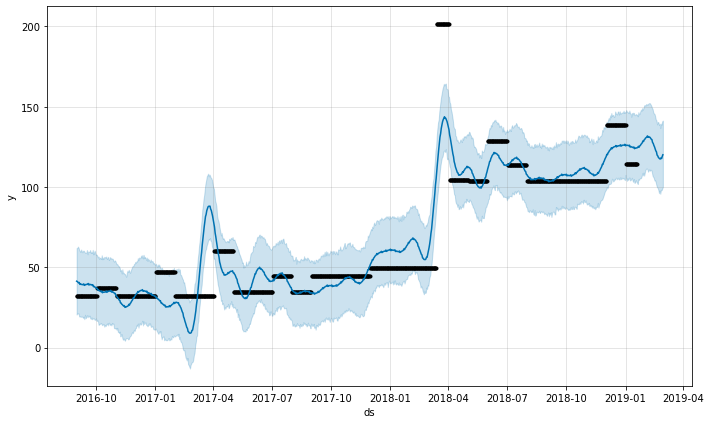

In [61]:
# esto no ira en produccion
# plot forecast
model.plot(forecast_df)
pyplot.show()

In [62]:
prediccion_recibo, = forecast_df.loc[forecast_df['ds'] == stat_mode_obj]['yhat']
prediccion_recibo

130.44688654784795

In [63]:
# if para decidir si genero aviso utilizando la prediccion de prophet

aviso = False

if num_recibos > 0:
    print("Te van a pasar el próximo recibo aproximadamente el: " + stat_mode_str)
    print("El importe aproximado del recibo será de: " + str(5*round(prediccion_recibo/5)) + ' eur')
    aviso = True
else:
    aviso = False

print('Aviso: ' + str(aviso))

Te van a pasar el próximo recibo aproximadamente el: 2019-2-1
El importe aproximado del recibo será de: 130 eur
Aviso: True


In [80]:
!python -V

Python 3.8.10


In [81]:
!pip3 list

Package                            Version
---------------------------------- -------------------
absl-py                            0.12.0
aiohttp                            3.7.4
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.10.0
anyio                              2.2.0
AnyQt                              0.0.13
argh                               0.26.2
argon2-cffi                        20.1.0
arviz                              0.11.2
asn1crypto                         1.4.0
astor                              0.8.1
astroid                            2.5
astropy                            4.2.1
astunparse                         1.6.3
async-generator                    1.10
async-timeout                      3.0.1
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.6
Babel                              2


Markdown                           3.3.4
MarkupSafe                         2.0.1
matplotlib                         3.3.4
mccabe                             0.6.1
menuinst                           1.4.16
mistune                            0.8.4
mkl-fft                            1.3.0
mkl-random                         1.2.1
mkl-service                        2.3.0
mock                               4.0.3
more-itertools                     8.7.0
mpl-scatter-density                0.7
mpmath                             1.2.1
msgpack                            1.0.2
multidict                          5.1.0
multipledispatch                   0.6.0
navigator-updater                  0.2.1
nbclassic                          0.2.6
nbclient                           0.5.3
nbconvert                          6.0.7
nbformat                           5.1.3
nest-asyncio                       1.5.1
netCDF4                            1.5.6
networkx                           2.5.1
nltk            

In [82]:
!pip3 freeze

absl-py @ file:///C:/ci/absl-py_1615411229697/work
aiohttp @ file:///C:/ci/aiohttp_1614361024229/work


alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client==1.7.2
anaconda-navigator==2.0.3
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1621348054992/work
anyio @ file:///C:/ci/anyio_1620153418380/work/dist
AnyQt @ file:///home/conda/feedstock_root/build_artifacts/anyqt_1620306236038/work
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037959010/work
arviz @ file:///tmp/build/80754af9/arviz_1614019183254/work
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astor==0.8.1
astroid @ file:///C:/ci/astroid_1613501047216/work
astropy @ file:///C:/ci/astropy_1617745647203/work
astunparse==1.6.3
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
async-timeout==3.0.1
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1620827162558/work
autopep8 @ file:///tmp/build/80754af9/autopep8_1615918855173/work
Babel @ file:///tmp/build/80754af9/babel_1620871417480/work
backcall @ file:///home/

In [83]:
!pip3 freeze > requirements_20210616_seguro_medico_prophet_ide.txt